In [ ]:
pip install lightgbm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

In [ ]:
class Student_type1():
    def __init__(self):
        f1 = truncnorm(a=(0-75)/10, b=(100-75)/10, loc=75, scale=10).rvs(size=1).astype(int)[0]
        f2 = truncnorm(a=(0-50)/10, b=(100-50)/10, loc=50, scale=10).rvs(size=1).astype(int)[0]
        f3 = truncnorm(a=(0-25)/10, b=(100-25)/10, loc=25, scale=10).rvs(size=1).astype(int)[0]
        self.features = [f1,f2,f3]

    def get_features(self):
        return self.features

    def get_reward(self,action,selected_type):
        type_error = 0
        if(selected_type != 1):
        #   print("type errorrrrrr")
          type_error = 1

        if action == 0:
            score = truncnorm(a=(0-40)/40, b=(100-40)/40, loc=40, scale=40).rvs(size=1).astype(int)[0]
        elif action == 1:
            score = truncnorm(a=(0-60)/10, b=(100-60)/10, loc=60, scale=10).rvs(size=1).astype(int)[0]
        else:
            score = truncnorm(a=(0-50)/20, b=(100-50)/20, loc=50, scale=20).rvs(size=1).astype(int)[0]

        #optimal_action = 0
        return 0.5*score + (1-type_error)*50

In [ ]:
class Student_type2():
    def __init__(self):
        f1 = truncnorm(a=(0-25)/10, b=(100-25)/10, loc=25, scale=10).rvs(size=1).astype(int)[0]
        f2 = truncnorm(a=(0-50)/10, b=(100-50)/10, loc=50, scale=10).rvs(size=1).astype(int)[0]
        f3 = truncnorm(a=(0-25)/10, b=(100-25)/10, loc=25, scale=10).rvs(size=1).astype(int)[0]
        self.features = [f1,f2,f3]

    def get_features(self):
        return self.features

    def get_reward(self,action,selected_type):
        type_error = 0
        if(selected_type != 2):
        #   print("type errorrrrrr")
          type_error = 1

        if action == 0:
            score = truncnorm(a=(0-70)/50, b=(100-70)/50, loc=70, scale=50).rvs(size=1).astype(int)[0]
        elif action == 1:
            score = truncnorm(a=(0-50)/30, b=(100-50)/30, loc=50, scale=30).rvs(size=1).astype(int)[0]
        else:
            score = truncnorm(a=(0-60)/20, b=(100-60)/20, loc=60, scale=20).rvs(size=1).astype(int)[0]
        #optimal_action = 0
        return 0.5*score + (1-type_error)*50

In [ ]:
class Student_type3():
    def __init__(self):
        f1 = truncnorm(a=(0-50)/10, b=(100-50)/10, loc=50, scale=10).rvs(size=1).astype(int)[0]
        f2 = truncnorm(a=(0-75)/10, b=(100-75)/10, loc=75, scale=10).rvs(size=1).astype(int)[0]
        f3 = truncnorm(a=(0-75)/10, b=(100-75)/10, loc=75, scale=10).rvs(size=1).astype(int)[0]
        self.features = [f1,f2,f3]

    def get_features(self):
        return self.features

    def get_reward(self,action,selected_type):
        type_error = 0
        if(selected_type != 3):
        #   print("type errorrrrrr")
          type_error = 1

        if action == 0:
            score = truncnorm(a=(0-20)/70, b=(100-20)/70, loc=20, scale=70).rvs(size=1).astype(int)[0]
        elif action == 1:
            score = truncnorm(a=(0-50)/10, b=(100-50)/10, loc=50, scale=10).rvs(size=1).astype(int)[0]
        else:
            score = truncnorm(a=(0-55)/5, b=(100-55)/5, loc=55, scale=5).rvs(size=1).astype(int)[0]

        #optimal_action = 2

        return 0.5*score + (1-type_error)*50

In [ ]:
import pandas as pd
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split


class Type_classifier():
        def __init__(self) :
            self.model = LGBMClassifier(max_depth= 9,  num_leaves= 50,min_child_samples= 30 ,verbose=-1)

        def create_dataset(self ):
            students_type = np.random.randint(1,4,(1000))
            X , y = [],[]
            for i in range(1000):
                if(students_type[i] == 1):
                    features =  Student_type1().get_features()
                    label = 1
                elif(students_type[i] == 2):
                    features =  Student_type2().get_features()
                    label = 2
                elif(students_type[i] == 3):
                    features =  Student_type3().get_features()
                    label = 3
                X.append(features)
                y.append(label)

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
            return X_train, X_test, y_train, y_test


        def train(self):
            x_train, x_test, y_train, y_test = self.create_dataset()

            self.model.fit(x_train, y_train)
            accuracy = self.model.score(x_test, y_test)
            print(f"Model accuracy : {accuracy}")
            return accuracy

        def predict_student_type(self , features):
            pred_type = self.model.predict(features)
            return  pred_type



In [ ]:
classifier = Type_classifier()
classifier.train()

students_type = np.random.randint(1,4,1)
print(f"true type : {students_type}")
features = []
if(students_type == 1):
    features = Student_type1().get_features()
elif(students_type == 2):
    features = Student_type2().get_features()
elif(students_type == 3):
    features = Student_type3().get_features()

pred_type = classifier.predict_student_type([features])
print(f"predicted type : {pred_type}")

Model accuracy : 1.0
true type : [1]
predicted type : [1]


In [ ]:
schools = {}
students_type = np.random.randint(1,4,(10,100))
for school in range(10):
  students_list = []
  for student in range(100):
    if(students_type[school,student] == 1):
      students_list.append(Student_type1())
    elif(students_type[school,student] == 2):
      students_list.append(Student_type2())
    elif(students_type[school,student] == 3):
      students_list.append(Student_type3())

    schools[school] = students_list

# Approach 1 -> train an agent for each context

In [ ]:
class Gradient_Bandit_agent:
    def __init__(self, agent_name , learning_rate = 0.1):
      self.name = agent_name
      self.l_r = learning_rate
      self.pref = np.zeros(3)
      self.all_rewards = []
      self.actions_trials = np.zeros(3)
      self.action_each_horizon = []
      self.regrets = 0

    def policy(self):
        h = self.pref - np.max(self.pref)
        exp = np.exp(h)
        self.probs = exp / np.sum(exp)
        return self.probs

    def take_action_get_reward(self,student , selected_type):
      action = np.random.choice(3,p=self.probs)
      reward = student.get_reward(action , selected_type)
      self.all_rewards.append(reward)
      self.actions_trials[action]+=1
      self.action_each_horizon.append(action)
      return action,reward

    def update_prefs(self,reward,action):
      avg_rewards = sum(self.all_rewards) / len(self.all_rewards)
      for i in range(num_arms):
        if(action==i):
          self.pref[i]+=self.l_r * (reward-avg_rewards)*(1-self.probs[i])
        else:
          self.pref[i]-=self.l_r * (reward-avg_rewards)*(self.probs[i])

    def cal_regret(self , action):
        delta = None
        if(self.name == "agent_type1" ):
            delta = [20,0,10]
        elif(self.name == "agent_type2" ):
            delta = [0,20,10]
        elif(self.name == "agent_type3" ):
            delta = [35,5,0]

        one_hot_encoded = [1 if i == action else 0 for i in range(num_arms)]
        regret = np.dot(one_hot_encoded , delta)
        self.regrets += regret
        return self.regrets


In [ ]:
def plot_multiple_run_with_confidence_interval(rewards , plot_name):
    # Calculate the mean and standard deviation of the reward sequences
    df = pd.DataFrame(rewards)

    mean_reward = df.mean(0).values
    std_reward = df.std(0,ddof=0).values

    # Calculate the confidence interval for the mean reward
    upper_bound = mean_reward + 1.96 * std_reward / np.sqrt(10)
    lower_bound = mean_reward - 1.96 * std_reward / np.sqrt(10)

    # Plot the mean reward and confidence interval
    fig, ax = plt.subplots()
    ax.plot(mean_reward, label=plot_name)
    ax.fill_between(np.arange(len(mean_reward)), lower_bound ,upper_bound , alpha=0.5, label="Confidence Interval")

    # Set the title and labels
    ax.set_title("Mean "+plot_name + " of 10 Run with 95% Confidence Interval")
    ax.set_xlabel("Trial")
    ax.set_ylabel(plot_name)

    # Show the plot
    plt.show()



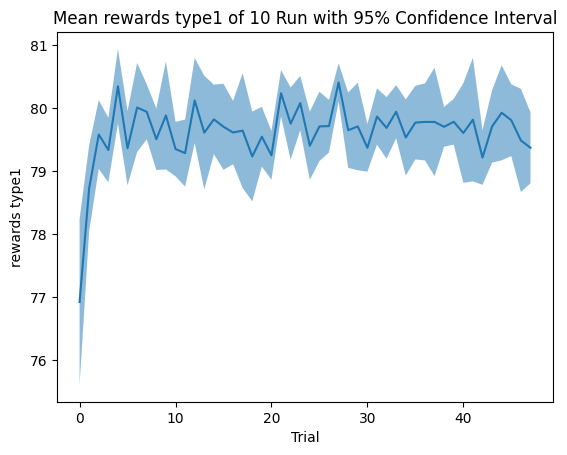

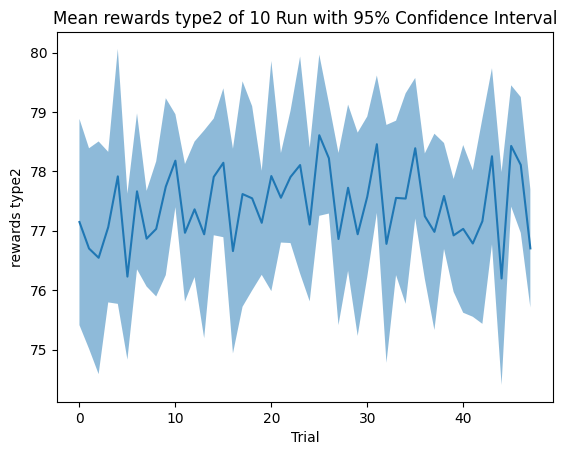

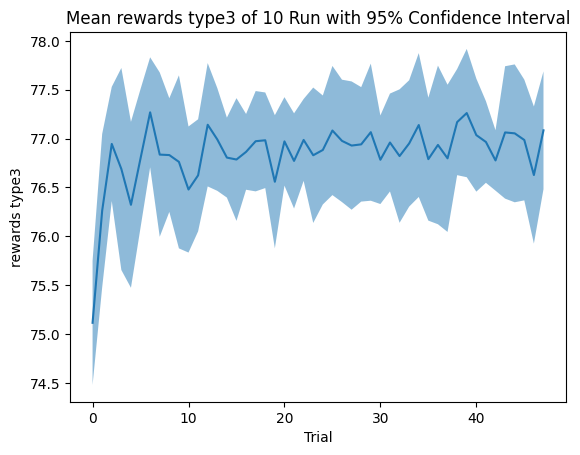

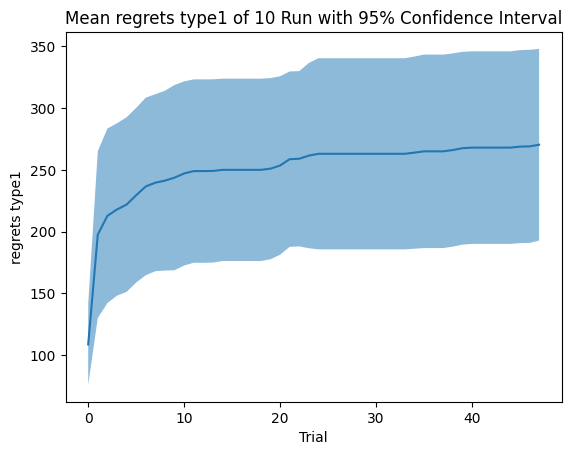

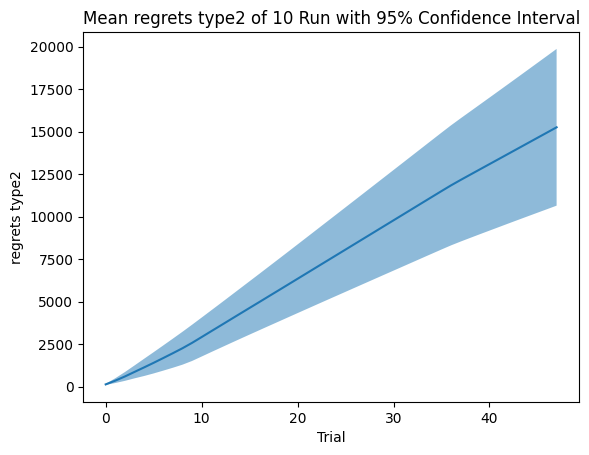

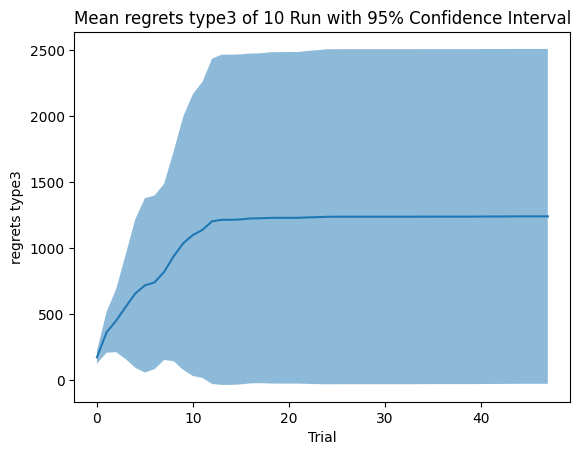

In [ ]:
horizon = 48 #48 week in a year
num_arms = 3

type1 = []
type2 = []
type3 = []

type1_regrets = []
type2_regrets = []
type3_regrets = []

for school in range(10):

    agent_type1 = Gradient_Bandit_agent("agent_type1")
    agent_type2 = Gradient_Bandit_agent("agent_type2")
    agent_type3 = Gradient_Bandit_agent("agent_type3")
    students_list = schools[school]

    reward_type1 = []
    reward_type2 = []
    reward_type3 = []
    regret_type1 = []
    regret_type2 = []
    regret_type3 = []

    for i in range(horizon):
        cumreward_1 = 0
        n_1 = 0
        cumreward_2 = 0
        n_2 = 0
        cumreward_3 = 0
        n_3 = 0
        cum_regret1 = 0
        cum_regret2 = 0
        cum_regret3 = 0

        for student in students_list :

            # predict student type
            features = student.get_features()
            pred_type = classifier.predict_student_type([features])

            # for each  student type
            if(pred_type == 1):
                # select best action
                agent_type1.policy()
                # act and collect reward
                [action,reward] = agent_type1.take_action_get_reward(student , pred_type)
                # update action preferences
                agent_type1.update_prefs(reward,action)

                cumreward_1 += reward
                n_1 += 1
                cum_regret1 += agent_type1.cal_regret(action)

            elif(pred_type == 2):
                agent_type2.policy()
                [action,reward] = agent_type2.take_action_get_reward(student , pred_type)
                agent_type2.update_prefs(reward,action)

                cumreward_2 += reward
                n_2 += 1
                cum_regret2 += agent_type2.cal_regret(action)


            elif(pred_type == 3):
                agent_type3.policy()
                [action,reward] = agent_type3.take_action_get_reward(student , pred_type)
                agent_type3.update_prefs(reward,action)

                cumreward_3 += reward
                n_3 += 1
                cum_regret3 += agent_type3.cal_regret(action)

        reward_type1.append(cumreward_1/n_1)
        reward_type2.append(cumreward_2/n_2)
        reward_type3.append(cumreward_3/n_3)

        regret_type1.append(cum_regret1/n_1)
        regret_type2.append(cum_regret2/n_2)
        regret_type3.append(cum_regret3/n_3)


    type1.append(reward_type1)
    type2.append(reward_type2)
    type3.append(reward_type3)

    type1_regrets.append(regret_type1)
    type2_regrets.append(regret_type2)
    type3_regrets.append(regret_type3)

plot_multiple_run_with_confidence_interval(type1 , "rewards type1")
plot_multiple_run_with_confidence_interval(type2 , "rewards type2")
plot_multiple_run_with_confidence_interval(type3 , "rewards type3")

plot_multiple_run_with_confidence_interval(type1_regrets , "regrets type1")
plot_multiple_run_with_confidence_interval(type2_regrets , "regrets type2")
plot_multiple_run_with_confidence_interval(type3_regrets , "regrets type3")

# Approch 2 -> train a Contextual_Bandit_agent for all contexts

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


class NeuralNetwork(nn.Module):
    def __init__(self, n_features):
        super(NeuralNetwork, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(n_features, 32), nn.ReLU(), nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layer(x)


class Contextual_Bandit_agent:
    def __init__(self, n_actions, n_features, learning_rate=0.01):
        self.n_actions = num_arms
        self.n_features = 3
        self.learning_rate = learning_rate

        # Initialize the neural network model for each action
        self.models = [NeuralNetwork(n_features) for _ in range(n_actions)]
        self.optimizers = [
            optim.Adam(model.parameters(), lr=self.learning_rate)
            for model in self.models
        ]
        self.criterion = nn.MSELoss()

    def predict(self, context):
        context_tensor = torch.tensor(context, dtype=torch.float32)  # Convert to tensor
        with torch.no_grad():
            return torch.cat(
                [model(context_tensor).reshape(1) for model in self.models]
            )

    def update(self, action, context, reward):
        self.optimizers[action].zero_grad()
        context_tensor = torch.tensor(context, dtype=torch.float32)  # Convert to tensor
        reward_tensor = torch.tensor(reward, dtype=torch.float32)  # Convert to tensor
        pred_reward = self.models[action](context_tensor)
        loss = self.criterion(pred_reward, reward_tensor)
        loss.backward()
        self.optimizers[action].step()


In [ ]:
horizon = 12
n_arms = 3

for school in range(10):

    agent = Contextual_Bandit_agent()
    students_list = schools[school]

    for i in range(horizon):
        for student in students_list :

            features = student.get_features()
            pred_type = classifier.predict_student_type([features])
            # The agent makes a prediction
            pred_rewards = np.array([agent.predict(features) for _ in range(n_arms)])

            # The agent chooses an action
            action = np.argmax(pred_rewards)

            # The agent gets a reward
            reward = student.get_reward(action, pred_type)

            # The agent updates its parameters
            agent.update(action , features, reward)